**2. Especialmente será interesante cómo se comportan los verracos que llevan regularmente un pinchazo de ENZAPROST 
o DINO (que son prostaglandinas que les estimulan puntualmente la libido pero puede que les baje la productividad 
inmediata o a corto plazo), así como el resto de medicaciones. Ten en cuenta que cuando un verraco recibe una 
medicación es porque está enfermo, así que lo normal será que su productividad esté disminuida. Supongo que será 
un reto encontrar relaciones sólidas entre tratamientos y calidad seminal o supervivencia del verraco en el centro.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')
df.head(5)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [3]:
df['COD_VERRACO'].value_counts().head()

1872    534
2094    446
1941    435
2095    433
2086    417
Name: COD_VERRACO, dtype: int64

In [4]:
supervivencia = pd.read_excel('VERRACOS.xlsx')
supervivencia.head()

,CODIGO,CLASE,VERRACO,TATUAJE,CENTRO,FECHA_NACTO,FECHA_LLEGADA,FECHA_SALIDA,ACTIVO,STRESS,PROCEDENCIA,DESTINO,CAUSA_BAJA,LINEA_GEN,INICIO_AMORT,COSTE_AMORT,MESES_AMORT,COD_ANT,PROPIEDAD_CLIENTE,COD_CLIENTE,ULTIMA_AMORTIZACION,IMP_PTE_AMORTIZAR,NUM_ACTIVO_FIJO,RECLAMADO,CUARENTENA,GENETICA,RAZA2,FECHA_ENTRADA_PROD
0,828,TUUUU,406,A4V7Z,CAL,NaT,2008-01-22,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-01-22,2500,18,828,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
1,829,TUUUU,407,A2V7W,CAL,2007-03-04,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,829,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
2,830,TUUUU,408,A8V2P,CAL,2007-12-21,2008-03-06,2009-01-08,False,NaN,NaN,CARNICAS CIEZANAS,15,NaN,2008-03-06,2500,18,830,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
3,831,TUUUU,409,S7N8F,CAL,2007-03-06,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,831,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
4,832,TUUUU,410,S8N7D,CAL,2007-05-11,2008-03-06,2008-12-11,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,832,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT


In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_tratamientos = pd.read_excel('TRATAMIENTOS_VERRACOS.xlsx')
df_tratamientos.head(15)

,CODIGO,COD_VERRACO,FECHA,DURACION,COD_TRATAMIENTO,NOTAS,CENTRO
0,29344,2221.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
1,29345,2407.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
2,29346,2409.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
3,29347,2416.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
4,29348,2419.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
5,29349,2422.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS
6,29350,2201.0,2019-05-27,2019-05-29,PARA,NaN,CAL
7,29351,2390.0,2019-05-27,2019-05-29,PARA,NaN,CAL
8,29352,2391.0,2019-05-27,2019-05-29,PARA,NaN,CAL
9,29353,2392.0,2019-05-27,2019-05-29,PARA,NaN,CAL


In [6]:
#Valor para marcar una altura para los días de inyecciones
df_tratamientos['POI'] = 20
df_tratamientos.head()

,CODIGO,COD_VERRACO,FECHA,DURACION,COD_TRATAMIENTO,NOTAS,CENTRO,POI
0,29344,2221.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
1,29345,2407.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
2,29346,2409.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
3,29347,2416.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
4,29348,2419.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20


In [7]:
verraco_2221_tratamiento = df_tratamientos[df_tratamientos['COD_VERRACO'] == 2221]
verraco_2221_tratamiento.head()

,CODIGO,COD_VERRACO,FECHA,DURACION,COD_TRATAMIENTO,NOTAS,CENTRO,POI
0,29344,2221.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
43,24506,2221.0,2018-05-20,2018-05-20,ENZAPROST,NO SALTA,PEÑAS,20
64,24527,2221.0,2018-05-24,2018-05-24,ENZAPROST,NO SALTA,PEÑAS,20
108,24501,2221.0,2018-05-17,2018-05-17,ENZAPROST,NO SALTA,PEÑAS,20
114,24542,2221.0,2018-05-27,2018-05-27,ENZAPROST,NO SALTA,PEÑAS,20


In [8]:
verraco_2221_tratamiento_ENZAPROST = verraco_2221_tratamiento[verraco_2221_tratamiento['COD_TRATAMIENTO'] == 'ENZAPROST']
verraco_2221_tratamiento_ENZAPROST.head()

,CODIGO,COD_VERRACO,FECHA,DURACION,COD_TRATAMIENTO,NOTAS,CENTRO,POI
0,29344,2221.0,2019-05-30,2019-05-30,ENZAPROST,NaN,PEÑAS,20
43,24506,2221.0,2018-05-20,2018-05-20,ENZAPROST,NO SALTA,PEÑAS,20
64,24527,2221.0,2018-05-24,2018-05-24,ENZAPROST,NO SALTA,PEÑAS,20
108,24501,2221.0,2018-05-17,2018-05-17,ENZAPROST,NO SALTA,PEÑAS,20
114,24542,2221.0,2018-05-27,2018-05-27,ENZAPROST,NO SALTA,PEÑAS,20


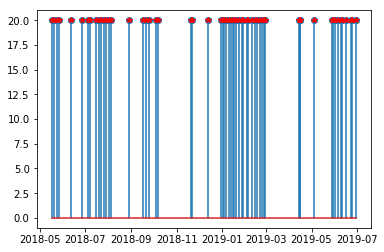

In [9]:
x = verraco_2221_tratamiento_ENZAPROST['FECHA']
y = verraco_2221_tratamiento_ENZAPROST['POI']

plt.stem(x, y)
plt.plot_date(x, y, '*', color='red');

In [10]:
verraco_2221_datos = df[df['COD_VERRACO'] == 2221]
verraco_2221_datos = verraco_2221_datos.sort_values(by='FECHA_REC')
verraco_2221_datos.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
69203,87118,2017-05-30,2221,720ND17,PEÑAS,68,58,416,179,9,8,33,0,0.0,0.0,0,0,False,I,OK,False,NaN,0.0000,False,27845.0,0.0,0.0,0.0,AND,0,NaN,NaN
69416,87302,2017-06-02,2221,720ND17,PEÑAS,68,58,426,116,9,9,22,22,0.0,1400.0,426,2246,True,OK,OK,True,20DNA12324,35.0625,True,28072.0,0.0,740.0,1400.0,AND,22,20.600000,10.7
69501,87557,2017-06-07,2221,720ND17,PEÑAS,68,69,518,97,9,9,22,22,0.0,1308.0,518,2284,True,OK,OK,True,20DNA12411,0.0000,True,27525.0,0.0,752.0,1308.0,AND,22,21.700001,10.5
69894,87816,2017-06-12,2221,720ND17,PEÑAS,47,58,399,84,8,8,15,15,0.0,846.0,399,2234,True,OK,OK,True,20DNA12508,0.0000,True,28115.0,0.0,760.0,846.0,AND,15,20.600000,10.4
70259,88256,2017-06-19,2221,720ND17,PEÑAS,47,69,470,145,8,7,30,30,0.0,2020.0,470,2272,True,OK,OK,True,20DNA12605,0.0000,True,28172.0,0.0,775.0,2020.0,AND,30,21.400000,10.9


In [11]:
x = verraco_2221_datos['FECHA_REC']
y = verraco_2221_datos['DOSIS_REAL']

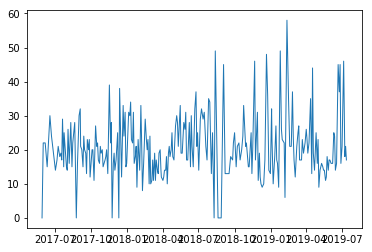

In [12]:
plt.plot(x, y, '-', linewidth=1)

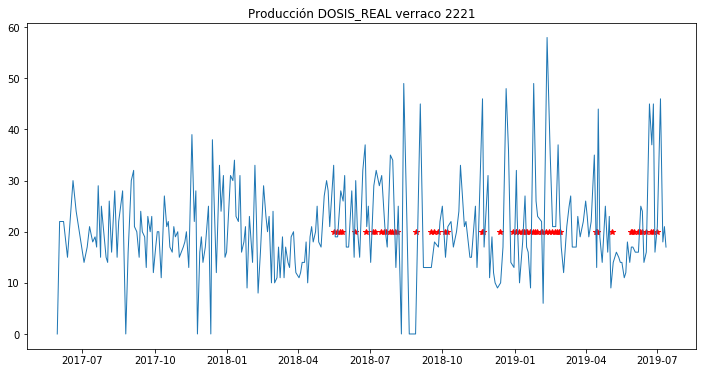

In [13]:
fig, ax = plt.subplots()

x = verraco_2221_tratamiento_ENZAPROST['FECHA']
y = verraco_2221_tratamiento_ENZAPROST['POI']

x1 = verraco_2221_datos['FECHA_REC']
y1 = verraco_2221_datos['DOSIS_REAL']

fig1 = plt.figure(1)
ax.plot_date(x, y, '*', color='red');
ax.plot(x1, y1, '-', linewidth=1)
plt.title('Producción DOSIS_REAL verraco 2221')
fig1.set_size_inches(12, 6)
plt.savefig("grafica_inyecciones.jpg")


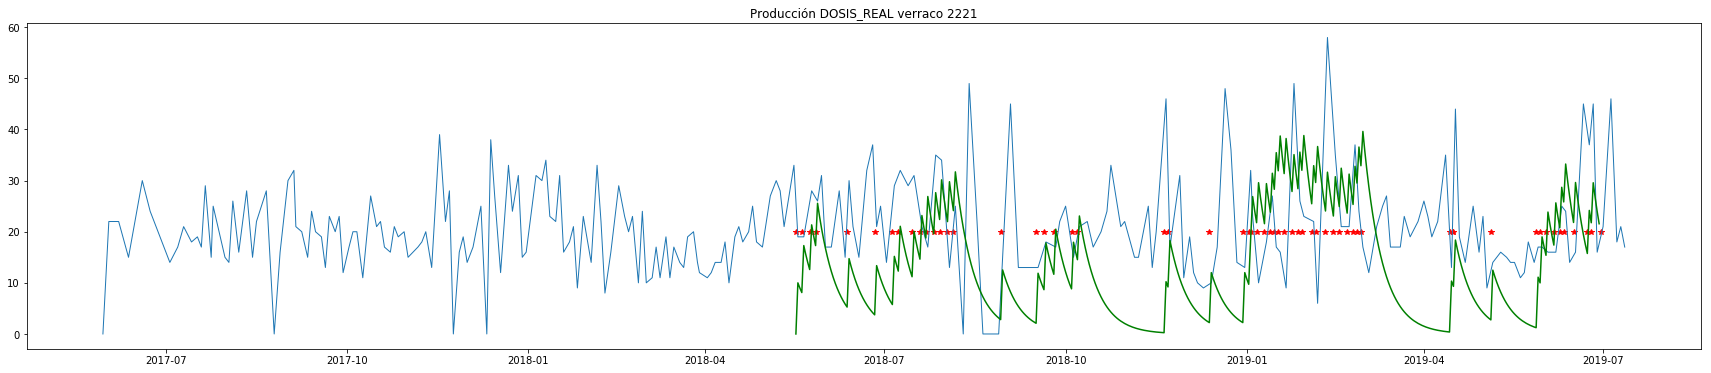

In [14]:
sorted_x = x.sort_values().reset_index()
diff_days = sorted_x["FECHA"].loc[-1:] - sorted_x["FECHA"].loc[0]

x_model = pd.DataFrame([i for i in range(diff_days.iloc[-1].days)], columns=["DIAS"])
x_model["INYECCION"] = x_model["DIAS"].isin(diff_days.dt.days)

tau = 10
step = 100
model = [0]
for i in range(diff_days.iloc[-1].days):
    delta = (step * x_model["INYECCION"][i] - model[-1]) / tau
    model.append(model[-1] + delta)

x_model["FILTRO"] = model[:-1]
x_model['DIAS'] = pd.to_timedelta(x_model['DIAS'], unit='D')
x_model['FECHA'] = sorted_x["FECHA"].iloc[0] + x_model['DIAS']

fig, ax = plt.subplots()

x = verraco_2221_tratamiento_ENZAPROST['FECHA']
y = verraco_2221_tratamiento_ENZAPROST['POI']

x1 = verraco_2221_datos['FECHA_REC']
y1 = verraco_2221_datos['DOSIS_REAL']

fig1 = plt.figure(1)
ax.plot_date(x, y, '*', color='red');
ax.plot(x1, y1, '-', linewidth=1)
ax.plot(x_model['FECHA'], x_model['FILTRO'], color='green')
plt.title('Producción DOSIS_REAL verraco 2221')
fig1.set_size_inches(30, 6)
plt.savefig("grafica_inyecciones.jpg")

In [15]:
verraco_2221_datos = verraco_2221_datos.drop_duplicates()
fechas = verraco_2221_datos[(verraco_2221_datos['FECHA_REC'] >= x_model['FECHA'].loc[0]) & (verraco_2221_datos['FECHA_REC'] <= x_model['FECHA'].iloc[-1])]['FECHA_REC']
fechas = fechas[fechas.isin(x_model['FECHA'])]

motilidad = verraco_2221_datos.loc[fechas.index]["MOTILIDAD"]
movimiento = verraco_2221_datos.loc[fechas.index]["CALIDAD_MOVIMIENTO"]
model_inyeccion = x_model[x_model['FECHA'].isin(fechas)]['FILTRO']

model_inyeccion.shape


(132,)

**Estas primeras conclusiones han sido sacadas para un verraco. Hay que hacerlo para todos ellos**

In [16]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [17]:
lista_verracos = df['COD_VERRACO'].value_counts().index.tolist()
#lista_verracos

In [18]:
lista_verracos[0]

1872

In [19]:
max_verracos = 1000

dosisreal = []
model_inyeccion = []
calidadmovimiento = []
motilidad = []
dias_estancia = []
dias_estancia_excitados = []

for i in range(max_verracos):
        
    datos = df[df['COD_VERRACO'] == lista_verracos[i]]
    datos = datos.drop_duplicates()

    datos = datos.sort_values(by='FECHA_REC')
    
    #calidadmovimiento = list(datos.loc[:, 'CALIDAD_MOVIMIENTO'])
    #motilidad = list(datos.loc[:, 'MOTILIDAD'])
    #print(calidadmovimiento)
    #print(motilidad)
    #print('**********')

    tratamientos = df_tratamientos[df_tratamientos['COD_VERRACO'] == lista_verracos[i]]
    tratamiento_ENZAPROST = tratamientos[tratamientos['COD_TRATAMIENTO'] == 'ENZAPROST']
    
    if (len(tratamiento_ENZAPROST) == 0):
        continue
        
    sorted_x = tratamiento_ENZAPROST['FECHA'].sort_values().reset_index()
    diff_days = sorted_x["FECHA"].loc[-1:] - sorted_x["FECHA"].loc[0]

    x_model = pd.DataFrame([i for i in range(diff_days.iloc[-1].days + 1)], columns=["DIAS"])
    x_model["INYECCION"] = x_model["DIAS"].isin(diff_days.dt.days)

    tau = 10
    step = 100
    model = []
    for j in range(diff_days.iloc[-1].days + 1):
        prev_value = 0
        if len(model) > 0:
            prev_value = model[-1]

        delta = (step * x_model["INYECCION"][j] - prev_value) / tau
        model.append(prev_value + delta)

    x_model["FILTRO"] = model        
    x_model['DIAS'] = pd.to_timedelta(x_model['DIAS'], unit='D')
    x_model['FECHA'] = sorted_x["FECHA"].iloc[0] + x_model['DIAS']

    fechas = datos[(datos['FECHA_REC'] >= x_model['FECHA'].loc[0]) & (datos['FECHA_REC'] <= x_model['FECHA'].iloc[-1])]['FECHA_REC']
    fechas = fechas.drop_duplicates()
    fechas = fechas[fechas.isin(x_model['FECHA'])]
    
    tiempo = supervivencia[supervivencia['CODIGO'] == lista_verracos[i]]
    tiempo = (tiempo['FECHA_SALIDA'] - tiempo['FECHA_LLEGADA']).dt.days
        
        
    #print(max(x_model[x_model['FECHA'].isin(fechas)]['FILTRO'].values.tolist()))
    #print('******************')
    dosisreal.extend(datos.loc[fechas.index]["DOSIS_REAL"].values.tolist())
    model_inyeccion.extend(x_model[x_model['FECHA'].isin(fechas)]['FILTRO'].values.tolist())
    calidadmovimiento.extend(datos.loc[fechas.index]["CALIDAD_MOVIMIENTO"].values.tolist())
    motilidad.extend(datos.loc[fechas.index]["CALIDAD_MOVIMIENTO"].values.tolist())
    

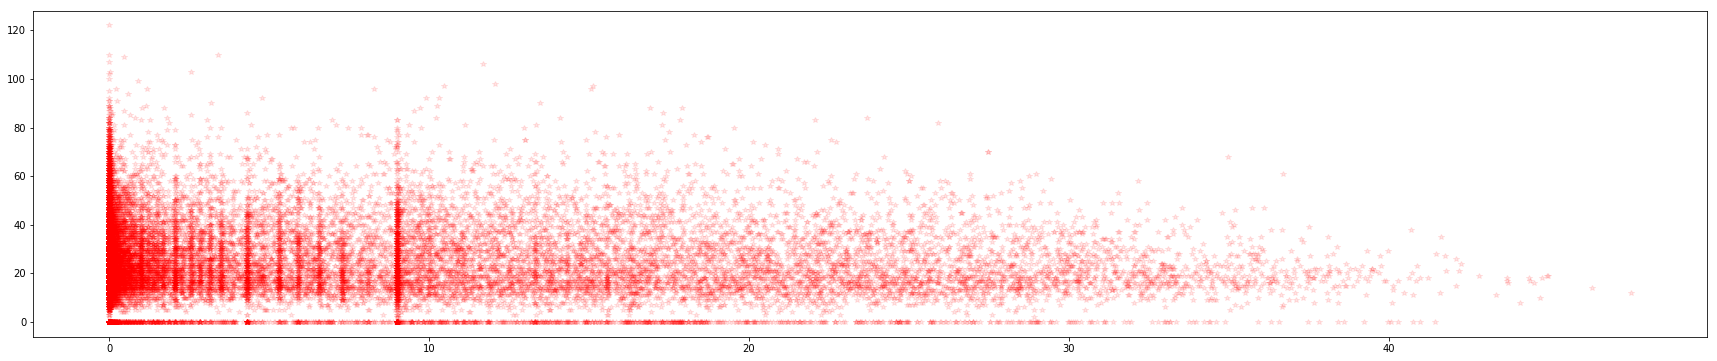

In [20]:
fig, ax = plt.subplots()

fig1 = plt.figure(1)
ax.plot(model_inyeccion, dosisreal, '*', color='red', alpha=0.1);
fig1.set_size_inches(30, 6)

In [21]:
temp = pd.DataFrame(model_inyeccion)
temp.columns = ['Excitacion']
temp['CalidadMovimiento'] = calidadmovimiento
temp.head()

,Excitacion,CalidadMovimiento
0,8.100000,7
1,15.561000,7
2,21.604410,7
3,23.849615,7
4,28.318188,8


In [22]:
temp[temp['CalidadMovimiento'] == 10]['Excitacion']

Series([], Name: Excitacion, dtype: float64)

/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


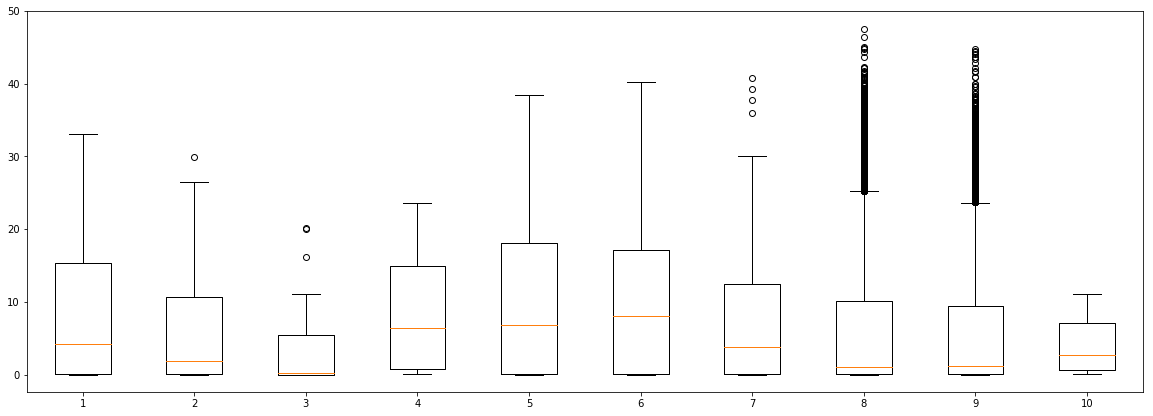

In [23]:
a = temp[temp['CalidadMovimiento'] == 0]['Excitacion']
plt.figure(figsize=(20,7))
plt.boxplot([temp[temp['CalidadMovimiento'] == 0]['Excitacion'], temp[temp['CalidadMovimiento'] == 1]['Excitacion'], temp[temp['CalidadMovimiento'] == 2]['Excitacion'],
             temp[temp['CalidadMovimiento'] == 3]['Excitacion'], temp[temp['CalidadMovimiento'] == 4]['Excitacion'], temp[temp['CalidadMovimiento'] == 5]['Excitacion'],
             temp[temp['CalidadMovimiento'] == 6]['Excitacion'], temp[temp['CalidadMovimiento'] == 7]['Excitacion'], temp[temp['CalidadMovimiento'] == 8]['Excitacion'],
             temp[temp['CalidadMovimiento'] == 9]['Excitacion']]);
    

In [24]:
temp2 = pd.DataFrame(model_inyeccion)
temp2.columns = ['Excitacion']
temp2['Motilidad'] = motilidad
temp2.head()

,Excitacion,Motilidad
0,8.100000,7
1,15.561000,7
2,21.604410,7
3,23.849615,7
4,28.318188,8


/home/dsc/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


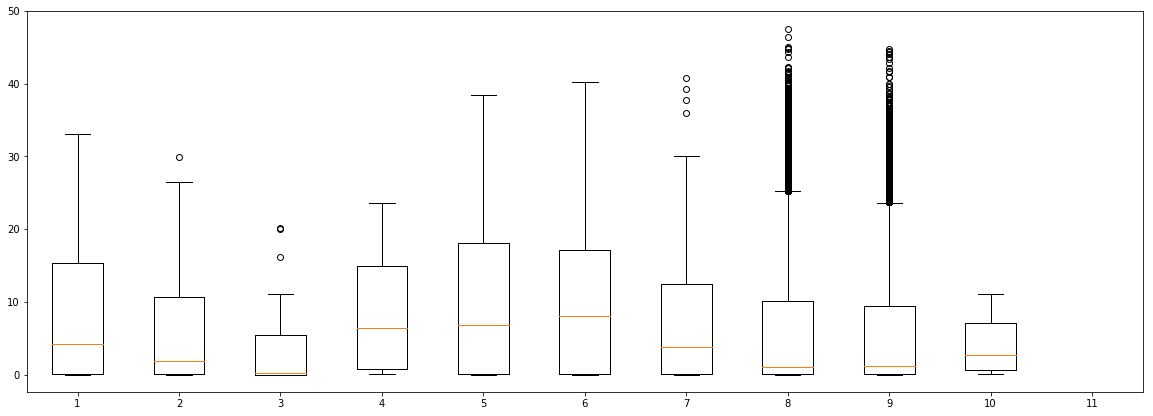

In [25]:
a2 = temp2[temp2['Motilidad'] == 0]['Excitacion']
plt.figure(figsize=(20,7))
plt.boxplot([temp2[temp2['Motilidad'] == 0]['Excitacion'], temp2[temp2['Motilidad'] == 1]['Excitacion'], temp2[temp2['Motilidad'] == 2]['Excitacion'],
             temp2[temp2['Motilidad'] == 3]['Excitacion'], temp2[temp2['Motilidad'] == 4]['Excitacion'], temp2[temp2['Motilidad'] == 5]['Excitacion'],
             temp2[temp2['Motilidad'] == 6]['Excitacion'], temp2[temp2['Motilidad'] == 7]['Excitacion'], temp2[temp2['Motilidad'] == 8]['Excitacion'],
             temp2[temp2['Motilidad'] == 9]['Excitacion'], temp2[temp2['Motilidad'] == 10]['Excitacion']]);
